<h2> Training Models </h2>

<h3> Linear Regression </h3> 

In [47]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

<img src="imagens/randlineardata.png" style="width: 400px;"> </img>

In [48]:
#Computa os parâmetros usando Normal Equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [49]:
#Agora é possivel fazer as predições, fazer primeiro para x = 0 e depois x = 2
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.0535494 ],
       [10.03534653]])

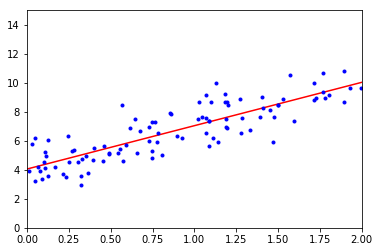

In [50]:
import matplotlib.pyplot as plt

#Faz plot com as duas predições feita com uma regressão e os dados
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [51]:
#Código equivalente usando Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.0535494]), array([[2.99089856]]))

In [52]:
#Os resultados ficaram bem próximos
lin_reg.predict(X_new)

array([[ 4.0535494 ],
       [10.03534653]])

<h4> Complexidade computacional </h4>

Como a equação normal calcula o inverso de $X^T.X$, que é uma matriz n x n (n é número de features) a complexidade é $O(n^{2.4}) $ até $O(n^3)$ dependendo da implementação. Simplificando, se dobrar o número de features o tempo de computação é multiplicado de 5.3 até 8.

Equação normal se torna muito lenta quando o número de features cresce muito (ex. 100.000)

O lado positivo é que a memória para armazenar o conjunto d treinamento é $O(m)$. Para a predição o tempo é linear.


<h4> Gradiente descendente </h4>

<img src="imagens/gradientdesc.png" style="width: 600px;"> </img>

O gradiente descendente funciona bem para função MSE, pois ela tem formato de uma bacia (bowl) então os passos caminham para o máximo local.

Para usar gradient descendente é desejavel que todas as features estejam na mesma escala, ou levará muito tempo para convergir.

<h4> Gradiente descendente  em lotes (batch)</h4>

<img src="imagens/batchgrad.png"> </img>

<img src="imagens/nextstep.png"> </img>

In [53]:
#Implementação
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # vetorizado
    theta = theta - eta * gradients

In [54]:
theta

array([[4.0535494 ],
       [2.99089856]])

<h3> Taxa de convergência </h3>

Quando a função é convexa e seu formato não muda abruptadamente (que é o caso da MSE) é possível mostrar que gradiente descendente em batch com passo de aprendizagem fixo tem taxa de convergência de $O(\frac{1}{iteration})$. Em outras palavras, se voce dividir a tolerância $\epsilon$ por 10 (para ter uma solução mais precisa), então o algoritmo tera que rodar 10 vezes mais interações.

<h3> Gradiente descendente estocástico </h3>

<img src="imagens/gradstoc.png" style="width: 400px;"> </img>

__simulated annealing__: Começar com passos grandes, pois ajuda a fazer grandes progressos e escapar de minímos locais e depois ir reduzindo o passo ajudando o algoritmo a chegar próximo do minímo global.

A função que determina o passo de aprendizagem a cada iteração é chamada de _learning schedule_.

In [55]:
#Implementa gradiente estocástico usando um learning schedule simples
n_epochs = 50
t0, t1 = 5, 50 # learning schedule 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [56]:
theta

array([[4.01853658],
       [3.04690894]])

In [57]:
#Usando o scikit-learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1) #épocas = 50, penalty = sem regularização, eta = passo aprendz 
#começando com 0.1 usando learning schedule (default) diferente do anterior
sgd_reg.fit(X, y.ravel())

C:\Users\LESC\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [58]:
#Encontrando uma solução muito próxima da retornada pela equação normal
sgd_reg.intercept_, sgd_reg.coef_

(array([4.05469138]), array([2.98616775]))

<h3> Gradiente descendente mini-batch </h3>

Faz o tradeoff entre o estocástico e o em lotes, é capaz de otimizar o tamanho para rodar em matrizes com GPU.

<img src="imagens/gradmini.png"> </img>

<img src="imagens/compgrad.png"> </img>

<h3> Polynomial Regression </h3>

Se a função for mais complexa do que uma aproximação em linha reta, é possível modelar uma função linear elevando as features a suas potências.

In [59]:
#Exemplo de dados
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

<img src="imagens/randlineardata2.png" style="width: 400px;"> </img>

In [60]:
#Usando função do scikit para transformar os dados de treino, adicionando potência de cada feature como uma nova feature
#Neste exemplo é usado apenas uma feature
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [61]:
#Feature inicial
X[0]

array([-2.14126384])

In [62]:
#Feature gerada
X_poly[0]

array([-2.14126384,  4.58501082])

In [63]:
#Fazendo a regressão com a nova feature
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89039453]), array([[1.09009519, 0.51851948]]))

<img src="imagens/randlineardata3.png" style="width: 400px;"> </img>

Não foi uma aproximação ruim, sabendo que a função geradora foi o ruído Gaussiano $y = 0.5x_1^2+1.0x_1+2$

A função PolynomialFeatures(), também adiciona novas features a partir da combinação das features, por exemplo se for adicionado duas features _a_ e _b_, além das features $a^2$, $a^3$, $b^2$ e $b^3$, também haverão as combinações $ab$, $a^2b$ e $ab^2$.

PolynomialFeatures(degree=d) transforms an array containing n features into an array containing $\frac{(n+d)!}{d!n!}$ features.

<h3> Learning Curves </h3>

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Plota O erro de treino e validação aumentando a quantidade de dados do conjunto de treino
#o gráfico mostra o erro de treino em vermelho que vai crescer inicialmente
# e o erro de validação em azul que cai por um momento

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    return (train_errors,val_errors)
    

(0, 3)

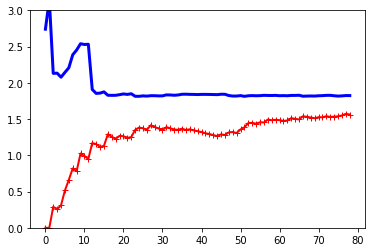

In [65]:
#Verificar a curva de aprendizagem com modelo linear simples
lin_reg = LinearRegression()
train_errors,val_errors = plot_learning_curves(lin_reg, X, y)
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
axes = plt.gca()
axes.set_ylim([0,3])

Percebe que no começo o erro de treino é zero porque ainda possui só uma variável e um linha encaixa perfeitamente, depois ele começa a cair até atingir um plateau em que novas instâncias no conjunto de treino ja não modifica muito a curva.

Percerber também que está ocorrendo um underfitting, pois ambas as curvas chegaram em um plateau, elas estão próximas e bastante altas.

DICA: Quando o modelo está underfitting com os dados, adicionar mais exemplos de treinos não irá ajudar no desempenho do modelo, é necessário criar um modelo mais complexo ou melhorar as features.

(0, 3)

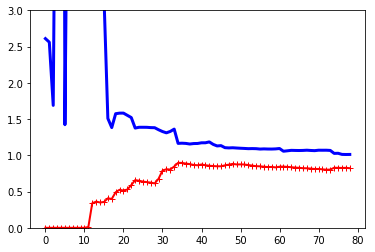

In [66]:
from sklearn.pipeline import Pipeline

#Agora olhar curva de aprendizagem com grau 10
polynomial_regression = Pipeline((("poly_features", PolynomialFeatures(degree=10, include_bias=False)),("sgd_reg", LinearRegression()),))
train_errors,val_errors = plot_learning_curves(polynomial_regression, X, y)
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
axes = plt.gca()
axes.set_ylim([0,3])

As curvas de aprendizado são parecidas mas existem duas diferenças importantes:
1. O erro no conjunto de treino é mais baixo 
2. Existe uma lacuna entre as curvas também, e o fato do erro de validação ser maior que treino de erro é uma marca de overfitting, porém as duas curvas tendem a se aproximar com o aumento das amostras de treino.

DICA: Uma forma de melhorar essa curva que aparenta overfitting é adicionar mais amostras de treino até o erro de validação alcançar o erro de treino

<h3> Bias/Variance tradeoff </h3>

___Bias___: 
    Esta parte do erro de generalização deve-se a hipóteses erradas, como assumir que os dados são lineares quando é realmente quadrático. Um modelo de alto bias é mais susceptível de underfit os dados de treinamento.
    
 ___Variance___: 
     Esta parte é devido à sensibilidade excessiva do modelo a pequenas variações nos dados de treinamento. Um modelo com muitos graus de liberdade (como um modelo polinomial de alto grau) provavelmente terá alta variação e, portanto, terá overfit nos dados de treinamento.
     
Acrescentar a complexidade de um modelo tipicamente aumenta a sua variancia e reduz o seu bias, e virce-versa. Isso que é chamado de tradeoff.
    

<h2> Regularized Linear Models </h2>

<h3> Rige Regression </h3>

<img src="imagens/ridge.png"> </img>

É muito importante escalonar os dados antes de regularizar

Na esquerda, usando modelo de Ridge com predição linear, na Direita usando PolynomialFeatures(degree=10) e escalonando com StandardScaler

<img src="imagens/ridge2.png"> </img>

In [67]:
#Usando Ridge Regression com scikit-learn, que utiliza por default o método dos minímos quadrados com regularização 
#(matrix factorization technique by André-Louis Cholesky)
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.20452516]])

In [68]:
#Agora com gradiente estocástico
sgd_reg = SGDRegressor(penalty="l2") #Penalty indica o hyperparametro de regularização, neste caso o 12 é o mesmo Ridge
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\LESC\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.43394896])

<h3> Lasso Regression </h3>

<img src="imagens/lasso.png"> </img>

Apenas substitui a metade da raiz da normal l2 pela norma l1 do vetor de peso

<img src="imagens/lasso2.png"> </img>

Uma característica importante da Lasso Regression e que ele tende a eliminar completamente os pesos das características menos importantes, então produz um modelo mais esparso e executa uma seleção de features.

<img src="imagens/lassoridgy.png"> </img>

NOTA: Na função de custo do Lass o BGD tende a oscilar em torno do 0 até o fim, isso é porque a forma muda abruptdamente com theta igual a zero, você precisa gradualmente reduzir a taxa de aprendizado para convergir ao miníimo global

In [69]:
#Lasso com Scikit-Learn ou pode usar o SGDRegressor(penalty="l1")
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.16846643])

<h3> Elastic Net </h3>

<img src="imagens/elastic.png"> </img>

A regularização elástica é um meio termo entre a regularização de Ridge e regularização de Lasso, controlando através da variável r, quando r = 0 é quivalente a de Ridge e quando r = 1 é equivalente a de Lasso

<h3> Conclusão sobre regularização </h3>

Na maioria das vezes é preferivel ter ao menos um pouco de regularização, a reg de Ridge é um bom default, mas se for suspeito que apenas algumas features são úteis para o modelo, pode ser preferivel a de Lasso ou Elastic, no geral a Elastic é mais preferivel que a de Lasso, porque a de Lasso pode se comportar de forma errada quando o número de features é maior que as instâncias de treino ou quando várias características são fortemente correlacionadas

In [70]:
#Reg elástica com Scikit-Learn
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) #l1_ratio corresponde ao r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.16787705])

<h3> Early stopping </h3>

<img src="imagens/early.png"> </img>

NOTA: Com gradiente estocástico ou mini-btach as curvas não são tão suaves, e pode ser dificíl saber se chegou no minímo ou não, a solução é, só parar quando continuar acima do minímo por um tempo, e dar um rollback para o minímo. 

In [71]:
#Implementação do early stopping com Scikit-Learn
#X_train_poly_scaled NÃO DEFINIDO
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,learning_rate="constant", eta0=0.0005) 
#Warm-state=True, indica que quando chama o fit() ele continua treinando da onde foi deixado, em vez de recomeçar do princípio
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off ORIGINAL
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train_poly_scaled' is not defined

<h2> Logistic Regression </h2>

<img src="imagens/logistic.png"> </img>

<img src="imagens/logistic2.png"> </img>

Para a regressão logística não existe o método dos minímos quadrados, porém a função ainda é convexa, sendo possível de encontrar o minímo global com gradiente descendente.

In [ ]:
#Fazer o teste com Scikit com database do iris
#Importa o database
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

In [ ]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [ ]:
#TReina o modelo
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

In [ ]:
#Dar uma olhada nas probabilidades para flores com petalas de tamanho variando de 0 até 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

<img src="imagens/logistic3.png"> </img>

<img src="imagens/logistic4.png"> </img>

Existe um certo overlap entre esses dois tipos de flores.

Por default o Scikit-Learn adiciona penalidade l2.

NOTA: Para o logistic regression no Scikit o modelo não usa o alpha, mas a sua inversa que o c, ou seja, quanto maior o c, menos o modelo é regularizado

<h3> Softmax Regression </h3>

A regressão logística pode ser treinada suportando multiplas classes diretamente, sem ter que treinar e combinar multiplos classificadores binários, isso é chamado de _Softmax Regression_ ou _Multinominal Logistic_

A ideia é simples: quando é dado ums instância x, o modelo Softmax primeiro computado uma pontuação $S_k(X)$ para cada classe k, e estima a probabilidade para cada classe aplicando a função softmax (também chamado de exponencial normalizado) ao score, essa função é basicamente a equation de predição da regressão linear -> $S_k(X) = Θ_k^T.X$

Após computar as pontuações de todas as classes para a instância x, você pode estimar a probabilidade $P_k$ que a instância pertence a classe k executando a função Softmax, que calcula o exponencial de todos os score, e então normaliza (dividindo pela soma de todos os exponenciais)

<img src="imagens/logistic5.png"> </img>

E então, o classificador predita a classe com maior probabilidade estimada (classe com maior score)

<img src="imagens/logistic6.png"> </img>

NOTA: o classificador Softmax somente prevê uma classe de cada vez (é multiclasse, não multipla saída), então só pode ser usado com classes mutualmente exclusivas. Você não pode usar para reconhecer várias pessoas em uma foto.

Para treinar o Softmax, o objetivo é ter um modelo que estima uma alta probabilidade para a classe certa e baixas para outras, a função usada é __Cross Entropy__, que penaliza o modelo quando estima ujmka baixa probabilidade para a classe correta.

__Cross Entropy__ é frequentemente usada para mensurar o qual bem um conjunto de probabilidades estimadas para classes combinam com classe correta.

<img src="imagens/logistic7.png"> </img>

In [72]:
#TReina softmax com Scikit. O default do logisticRegression do scikit usa um-contra-todos, mas setando multi_class hyperparametro
#para multinominal para trocar para o Softmax. Também é necessário setar um solucionador que tenha suporte para Softmax como o
#solver="lbfgs", também é aplicado regularização l2 por default.

X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
#Fazer predict com petals 5cm long e 2 cm wide
softmax_reg.predict([[5, 2]])

array([2])

In [74]:
#Probabilidade para cada classe
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

<img src="imagens/logistic8.png"> </img>